In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 


In [30]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [31]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [32]:
df.shape

(13320, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [34]:
df.isnull().sum() 

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [35]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


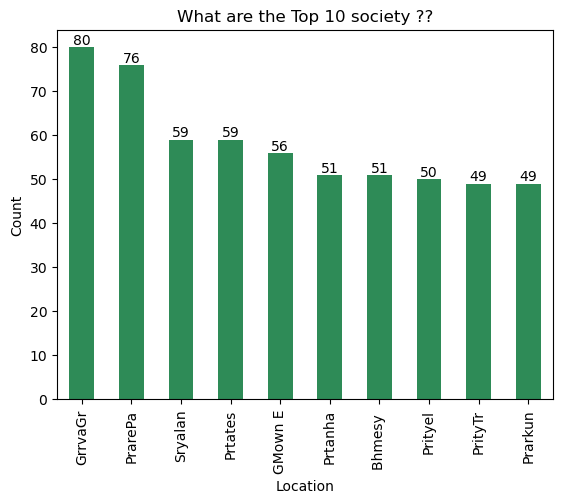

In [36]:
s = df['society'].value_counts().nlargest(10).plot(kind='bar', color='seagreen')

for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 society ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

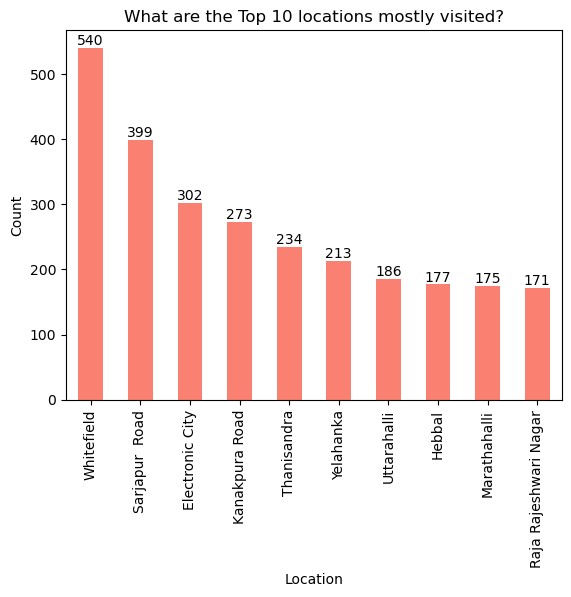

In [37]:
la = df['location'].value_counts().nlargest(10).plot(kind='bar', color='salmon') 

for p in la.patches:
    la.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 locations mostly visited?')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [38]:

df['size'].fillna(value=df['size'].mode(), inplace=True)
df['bath'].fillna(method='ffill', inplace=True)
df['balcony'].fillna(method='ffill', inplace=True)
df = df.drop(columns=['society', 'availability','location'])
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13073 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(4), object(2)
memory usage: 624.5+ KB


In [40]:
df.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [41]:
df.dropna(inplace=True)

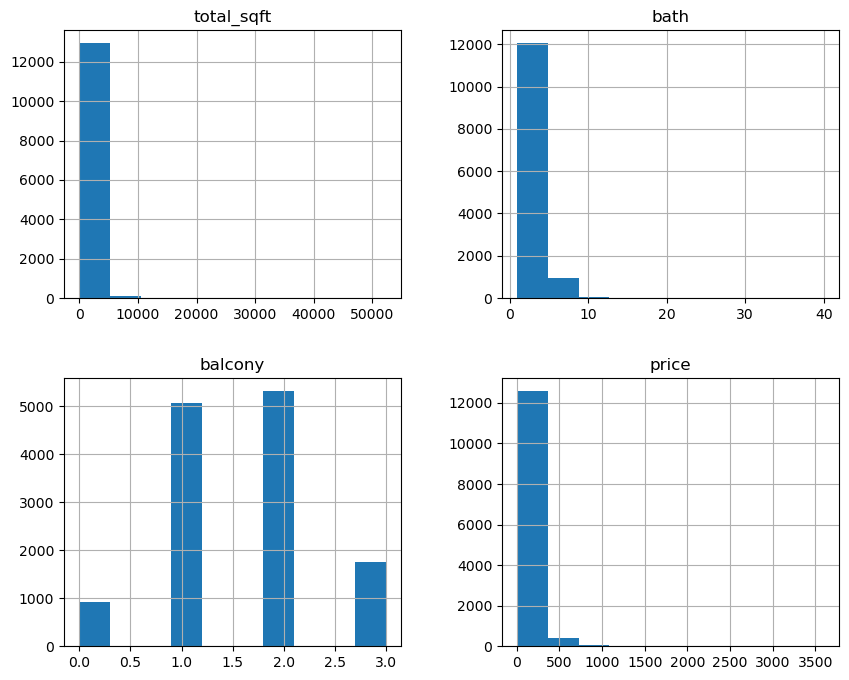

In [42]:
df.hist(figsize=(10,8))
plt.show()

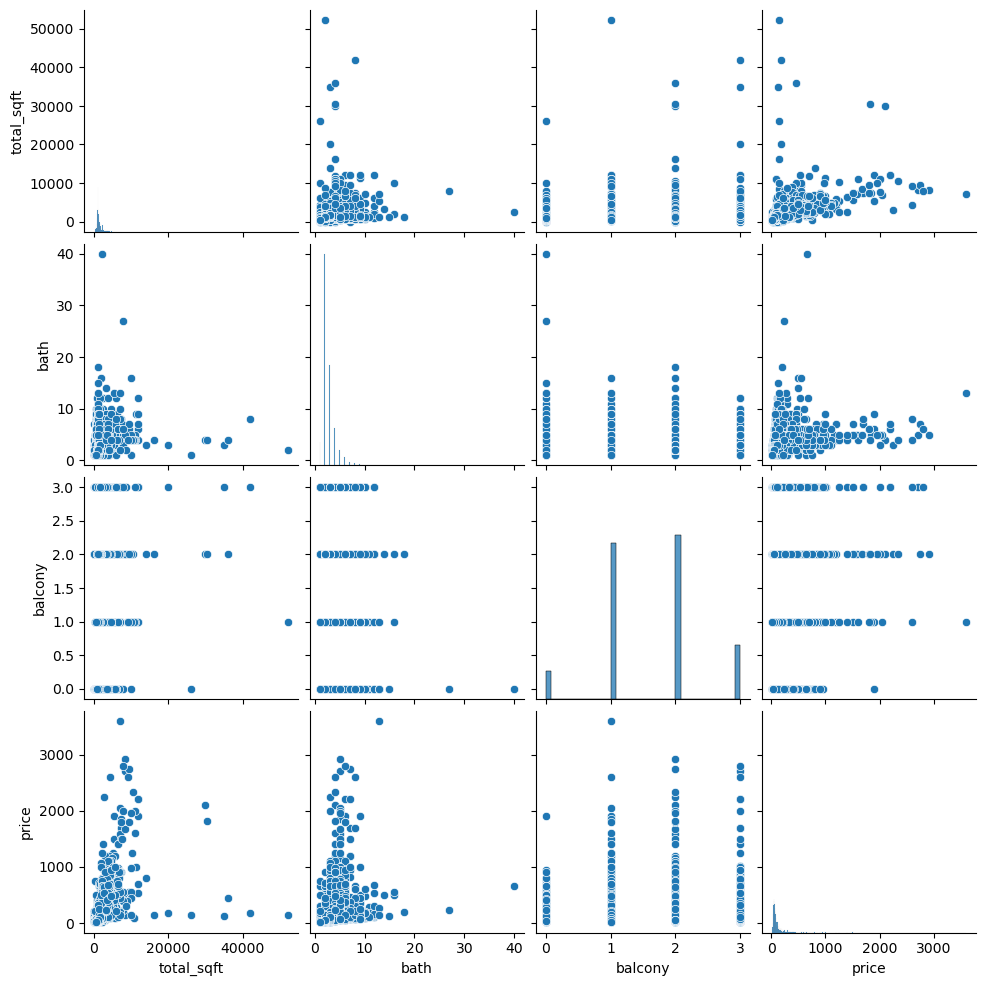

In [16]:
sns.pairplot(df)
plt.show()

In [15]:
df['size'].value_counts()

size
2 BHK         5148
3 BHK         4254
4 Bedroom      811
4 BHK          546
3 Bedroom      542
1 BHK          492
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

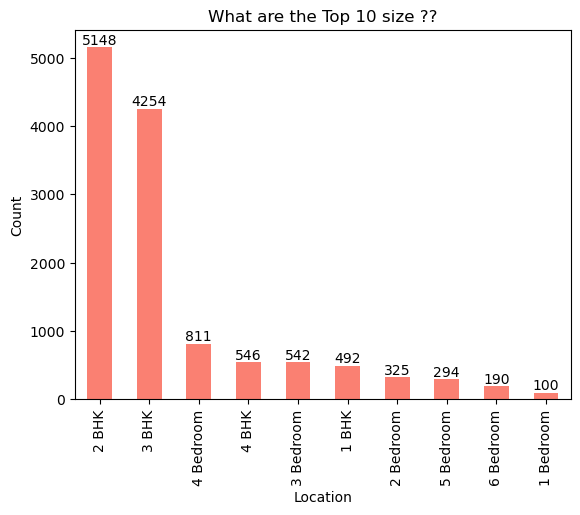

In [43]:
l = df['size'].value_counts().nlargest(10).plot(kind='bar', color='salmon') 

for p in l.patches:
    l.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 size ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

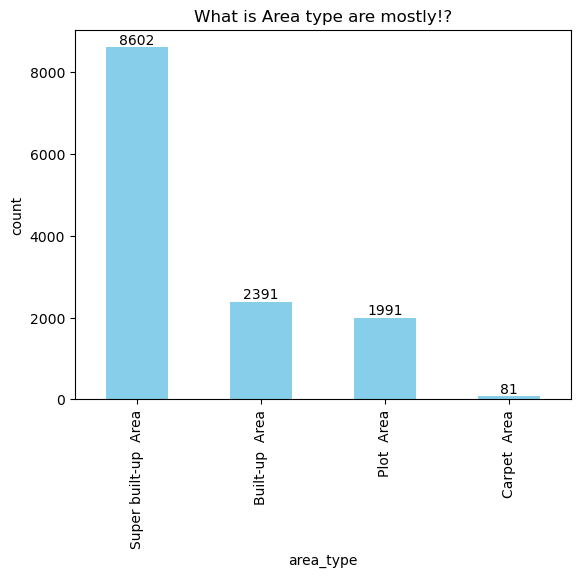

In [44]:
at=df['area_type'].value_counts().plot(kind='bar',color='skyblue')
for p in at.patches:
    at.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What is Area type are mostly!?')
plt.xlabel('area_type')
plt.ylabel('count')
plt.show()

In [45]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,3 BHK,1440.0,2.0,3.0,62.00
3,Super built-up Area,3 BHK,1521.0,3.0,1.0,95.00
4,Super built-up Area,2 BHK,1200.0,2.0,1.0,51.00


In [19]:
df.describe()

,total_sqft,bath,balcony,price
count,13065.000000,13065.000000,13065.000000,13065.000000
mean,1554.546892,2.691772,1.605741,112.514048
std,1238.422934,1.335653,0.805588,149.662725
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


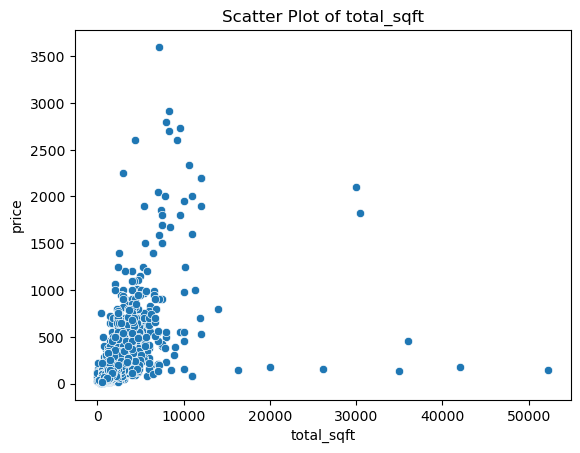

In [46]:
sns.scatterplot(x='total_sqft', y='price', data=df)  
plt.title('Scatter Plot of total_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price')  
plt.show()

In [47]:
df.loc[df['total_sqft'] >= 10000, 'total_sqft'] = np.nan

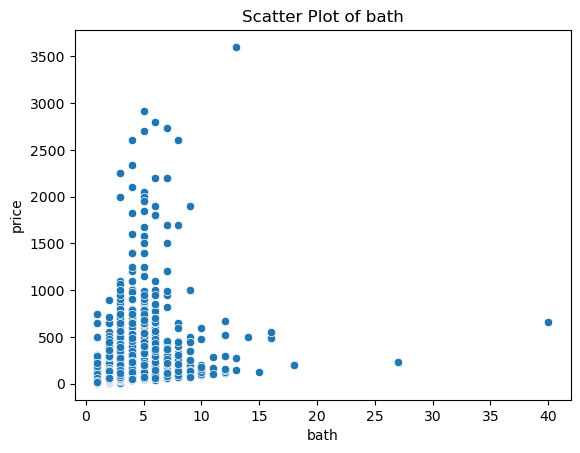

In [49]:
sns.scatterplot(x='bath', y='price', data=df)  
plt.title('Scatter Plot of bath')
plt.xlabel('bath')
plt.ylabel('price')  
plt.show()

In [50]:
df.loc[df['bath'] >= 17.5, 'bath'] = np.nan

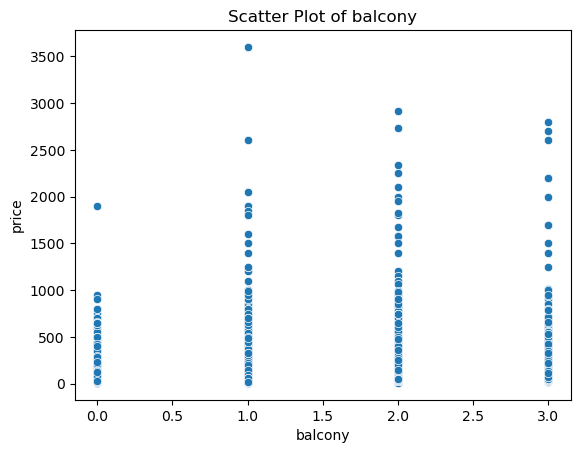

In [51]:
sns.scatterplot(x='balcony', y='price', data=df)  
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')  
plt.show()

In [52]:
df.drop(columns='area_type', inplace=True)

In [53]:
df.drop(columns='size', inplace=True)

# Feature Scale

In [54]:
df

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13315,3453.0,4.0,0.0,231.00
13316,3600.0,5.0,0.0,400.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [55]:
df.isnull().sum()

total_sqft    27
bath           3
balcony        0
price          0
dtype: int64

In [56]:
df.dropna(inplace=True)

# Normalization

In [57]:
df['sqft_price']=df['total_sqft']*df['price']

In [58]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [59]:
df=df_scaled.copy()

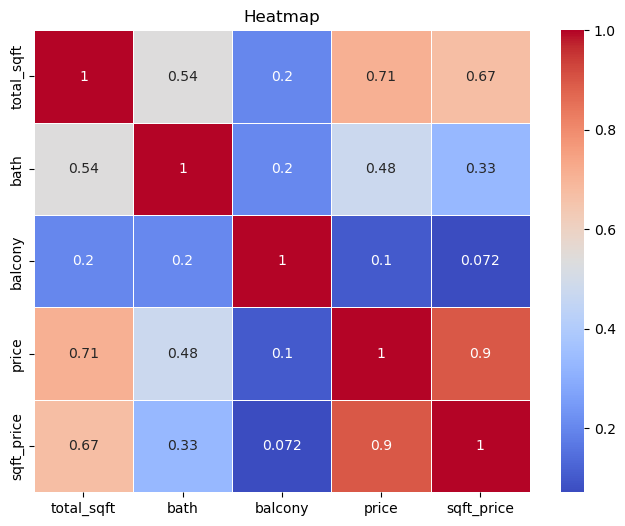

In [60]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap')
plt.show()

# Model..


In [61]:
X = df.drop(['price'],axis='columns')
y = df.price

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()


In [64]:
lr_clf.fit(X_train,y_train)

LinearRegression()

In [65]:
lr_clf.score(X_train,y_train)

0.8474550965409182

In [66]:
lr_clf.score(X_test,y_test)

0.8486179305911087

In [67]:
y_pred=lr_clf.predict(X_test)

In [68]:
y_pred

array([0.01465232, 0.03601126, 0.02860234, ..., 0.01524071, 0.01944679,
       0.29165501])

In [69]:
result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df

,Actual,Predicted
0,0.010301,0.014652
1,0.042873,0.036011
2,0.030624,0.028602
3,0.021896,0.019479
4,0.036192,0.038548
...,...,...
2602,0.049276,0.035508
2603,0.007238,0.014829
2604,0.013641,0.015241
2605,0.022829,0.019447


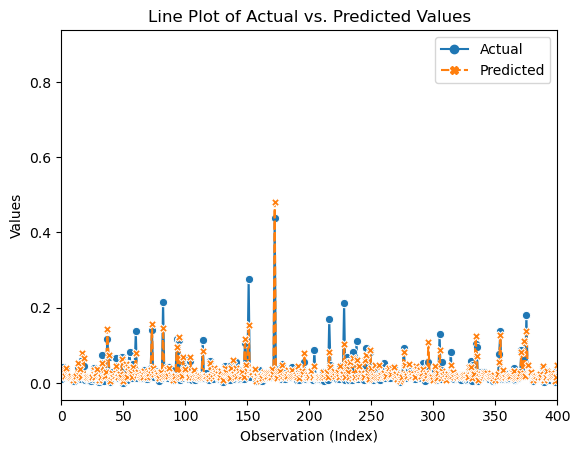

In [70]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=lr_clf.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=lr_clf.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))

Mean Absolute Error is:  0.007943485946466777
R-squared (coefficient of determination) score is : 81.17%
Accuracy for Training: 84.75%
Accuracy for Testing: 84.86%
